In [1]:
import os
from PIL import Image                       # package to manipulate and import images   
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch                                # package for deeplearning
from torch import nn
from torch.utils.data import DataLoader     # pytorch dataloader for easily loading minibatches during training
import torchvision                          # package for using images in deeplearning (computer vision)

from dataset import train_dataset, path_dict           # script for creating custom dataset




# Exploring the Data (Images)  
### Convert single image to tensor and plot tensor

In [27]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.1.jpg') ### image path on local device

In [28]:
image.getpalette # images are CMYK instead of RGB

<bound method Image.getpalette of <PIL.JpegImagePlugin.JpegImageFile image mode=CMYK size=335x400 at 0x1A2DBBD110>>

In [29]:
image.show() # view image

In [30]:
# to convert from CMYK to RGB
if image.mode == 'CMYK':
    image = image.convert('RGB')
    
image.show()

In [35]:
transform = torchvision.transforms.ToTensor() # create transform that changes image to tensor

In [36]:
image = transform(image) # transform image to tensor

In [109]:
image.size() # view image-tensor dimensions, there are 3 channels now (RGB) and the image 
             # is 400 pixels by 335 pixels

torch.Size([3, 190, 500])

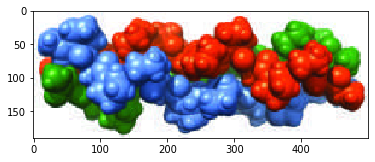

In [110]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image))   # plot image-tensor 
                                                                    #(note the same as origional image)

# Train Dataset Class   
### Changing images to tensors and create dataloader  
Class has been created created. Here are the outstanding issues:  
     
  1) need to add option to make all images the same size  
  2) need to add captions if they can be accessed 
  

#### Below is used for testing:

In [10]:
#CREATE TRAIN DATASET CLASS

# Define arguments for train_dataset class
annotation_path = '/Users/ianleefmans/Desktop/data/train/part1/part1_2.json'
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path)

#create trainset
train_set = train_dataset(annotation_path, index_dict, img_dir = path, 
                          transform = torchvision.transforms.ToTensor(), channel='RGB')



In [11]:
train_set[32794]

/Users/ianleefmans/Desktop/data/train/part2/part2_images/77/3328.jpg


{'image': tensor([[[0.4941, 0.2314, 0.4078,  ..., 0.6078, 0.6118, 0.6392],
          [0.9020, 0.7686, 0.8510,  ..., 0.6235, 0.6157, 0.6118],
          [0.8627, 0.8706, 0.8627,  ..., 0.6235, 0.6196, 0.6275],
          ...,
          [1.0000, 0.9961, 1.0000,  ..., 0.8941, 0.8863, 0.8941],
          [1.0000, 0.9961, 0.9961,  ..., 0.9059, 0.8980, 0.8706],
          [1.0000, 0.9961, 1.0000,  ..., 0.8863, 0.9020, 0.8824]],
 
         [[0.5725, 0.3098, 0.4824,  ..., 0.7373, 0.7529, 0.7804],
          [0.9882, 0.8510, 0.9333,  ..., 0.7529, 0.7451, 0.7490],
          [0.9569, 0.9647, 0.9569,  ..., 0.7451, 0.7490, 0.7569],
          ...,
          [1.0000, 0.9961, 1.0000,  ..., 0.8941, 0.8863, 0.8941],
          [1.0000, 0.9961, 0.9961,  ..., 0.9059, 0.8980, 0.8706],
          [1.0000, 0.9961, 1.0000,  ..., 0.8863, 0.9020, 0.8824]],
 
         [[0.4667, 0.2118, 0.3961,  ..., 0.8039, 0.8157, 0.8431],
          [0.9412, 0.8157, 0.8980,  ..., 0.8196, 0.8118, 0.8235],
          [0.9647, 0.9725, 0.97

/Users/ianleefmans/Desktop/data/train/part2/part2_images/77/3328.jpg


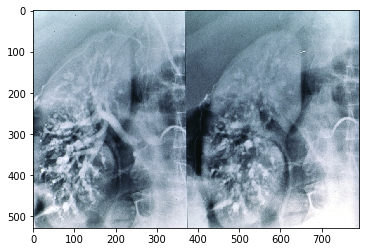

In [12]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(train_set[32794]['image'])) #plot indexed imaged
                                                                                         #from dataset 1716
    
                                                                                    # good test cases 841 , 1716

In [13]:
#define custom collate function
def my_collate(batch):
    data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    return data

# create dataloader
trainset = DataLoader(dataset=train_set,
                      batch_size=4,
                      shuffle=True,
                      collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [16]:
sample = iter(trainset).next() #iterate to next minibatch from dataloader
print(sample[2]['image'].size()) # show size of one picture in the minibatch


/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.232.jpg
/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.63.jpg
/Users/ianleefmans/Desktop/data/train/part2/part2_images/56/2274.jpg
/Users/ianleefmans/Desktop/data/train/part2/part2_images/0/41.jpg
torch.Size([3, 518, 792])


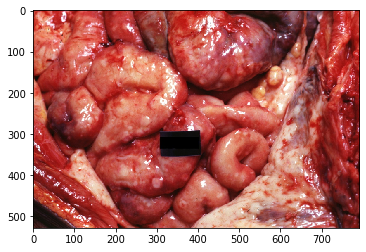

In [17]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample[3]['image'])) #plot image from minibatch

#### Image expansion testing

In [41]:
def expand(image, largest_dimension, resample=0):
    #resample options (see Pil.Image.resize for more documentation):
        #0 :Nearest neighbors (default)
        #PIL.Image.BILINEAR
        #Image.BICUBIC
        #Image.LANCZOS 
    if image.height>= image.width:
        new_width = round((image.width/image.height)*largest_dimension)
        new_height = largest_dimesion
    else:
        new_height = round((image.height/image.width)*largest_dimension)
        new_width = largest_dimension
    image = image.resize((new_width, new_height), resample=resample )
    return image

In [32]:
image = expand(image, 200)
image.show()

In [33]:
image.getpalette

<bound method Image.getpalette of <PIL.Image.Image image mode=RGB size=168x200 at 0x1A2DBE6890>>

In [34]:

def uniform_size(x, height, width):
    tup_val1 = round(((width-x.size()[2])/2)-.1)
    tup_val2 = round(((width-x.size()[2])/2)+.1)
    tup_val3 = round(((height-x.size()[1])/2)-.1)
    tup_val4 = round(((height-x.size()[1])/2)+.1)

    tup = (tup_val1, tup_val2, tup_val3, tup_val4)

    pad = nn.ZeroPad2d(tup)
    padded = pad(x)
    return padded

In [37]:
image2 = uniform_size(image, 200, 200)

In [38]:
image2.size()

torch.Size([3, 200, 200])

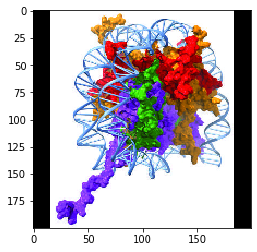

In [39]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image2))

#### Testing to find largest image dimensions

In [50]:
height = 0
width = 0
height_tot = 0
width_tot = 0
count = 0
for i in range(820):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.'+str(i)+'.jpg')
        if image.height>height:
            height = image.height
        if image.width>width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
for i in range(886):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/img_'+str(i)+'.jpg')
        if image.height>height:
            height = image.height
        if image.width>width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path)
count_h=0
count_w=0
for i in range(3329):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/'+str(index_dict[i])+ '/'+ str(i)+'.jpg')
        if image.height>height:
            height = image.height
        else:
            count_h+=1
        if image.width>width:
            width = image.width
        else:
            count_w+=1
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
height_avg = height_tot/count
width_avg = width_tot/count


In [43]:
height

1310

In [44]:
width

1544

In [46]:
count_h

3329

In [47]:
count_w

3329

In [51]:
height_avg

491.0894357743097

In [52]:
width_avg

707.9197679071628

In [53]:
count

4998